In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [126]:
df = pd.read_csv('regression2.csv',index_col=0)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 04/07/2018 to 05/12/2018
Data columns (total 7 columns):
Organic Search           155 non-null int64
CRM                      155 non-null int64
Paid Search Brand        155 non-null int64
Direct                   155 non-null int64
Paid Search Non Brand    155 non-null int64
Affiliate                155 non-null int64
Sales                    155 non-null int64
dtypes: int64(7)
memory usage: 9.7+ KB


In [128]:
X = df.drop('Sales',axis=1)

In [129]:
y = df['Sales']

In [130]:
from sklearn.cross_validation import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [132]:
df.corr()

,Organic Search,CRM,Paid Search Brand,Direct,Paid Search Non Brand,Affiliate,Sales
Organic Search,1.000000,0.684565,0.959201,0.981364,0.966012,0.947524,0.953676
CRM,0.684565,1.000000,0.702795,0.732784,0.636864,0.691190,0.748755
Paid Search Brand,0.959201,0.702795,1.000000,0.962188,0.967976,0.933727,0.949653
Direct,0.981364,0.732784,0.962188,1.000000,0.959326,0.942068,0.961409
Paid Search Non Brand,0.966012,0.636864,0.967976,0.959326,1.000000,0.930440,0.931793
Affiliate,0.947524,0.691190,0.933727,0.942068,0.930440,1.000000,0.925838
Sales,0.953676,0.748755,0.949653,0.961409,0.931793,0.925838,1.000000


Fitting a simple linear regression model first#

In [133]:
lm = LinearRegression()

In [134]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
pd.DataFrame(lm.coef_, X.columns)

,0
Organic Search,0.270121
CRM,0.059340
Paid Search Brand,0.166196
Direct,0.188183
Paid Search Non Brand,0.024987
Affiliate,0.491323


In [136]:
predictions = lm.predict(X_test)

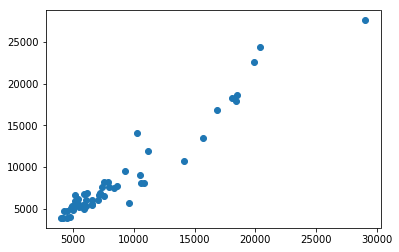

In [137]:
plt.scatter(y_test,predictions)

In [138]:
from sklearn import metrics

In [139]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  967.0433604524376
MSE:  2011350.767332946
RMSE:  1418.2209867763718


In [140]:
metrics.explained_variance_score(y_test,predictions)

0.928583093053391

C:\Users\felix.therrien\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


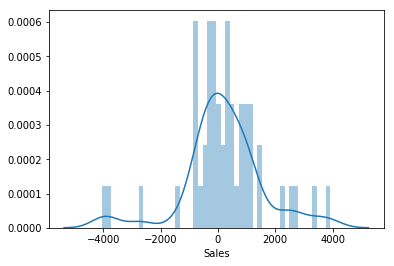

In [141]:
sns.distplot((y_test-predictions),bins=50)

In [142]:
import statsmodels.api as sm

In [143]:
ols_model = sm.OLS(y_train, X_train).fit()

In [144]:
ols_preds = ols_model.predict(X_test)

In [145]:
ols_summary = ols_model.summary()
print(ols_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     669.3
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           1.41e-76
Time:                        15:05:02   Log-Likelihood:                -908.97
No. Observations:                 103   AIC:                             1830.
Df Residuals:                      97   BIC:                             1846.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Organic Search           -0.10

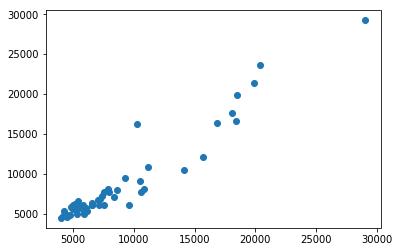

In [146]:
plt.scatter(y_test,ols_preds)

In [147]:
from sklearn.linear_model import Lasso

In [150]:
lasso = Lasso(alpha=0.1)

In [151]:
lasso.fit(X_train, y_train)

C:\Users\felix.therrien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [152]:
lasso_preds = lasso.predict(X_test)

In [153]:
pd.DataFrame(lasso.coef_, X.columns)

,0
Organic Search,0.270121
CRM,0.059340
Paid Search Brand,0.166196
Direct,0.188183
Paid Search Non Brand,0.024987
Affiliate,0.491322


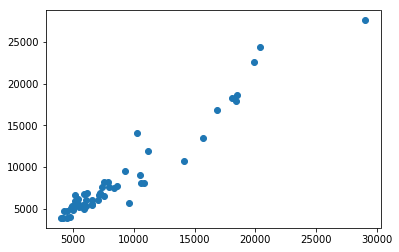

In [154]:
plt.scatter(y_test,lasso_preds)